#               # Data Science Домашнє завдання модуль 2 
                Частина третя: Аналіз датасет c Kaggle.com

Імпорт модулів

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Скачуємо запропонований файл для аналізу за посиланням в завданні і переміщаємо в папку з завданням. Імя файлу "bestsellers with categories.csv"
1.Читаємо csv файл (використовуйте функцію read_csv)

In [278]:
df = pd.read_csv('bestsellers with categories.csv')


2.Виведіть перші п'ять рядків (використовується функція head)

In [279]:
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


3.Виведіть розміри датасету (використовуйте атрибут shape)


In [280]:
rows, columns = df.shape
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

Кількість рядків:  550
Кількість стовбців:  7


Тестовий приклад : Про скільки книг зберігає дані датасет?

In [281]:
print(f"Відповідь : {df.shape[0]}") # В нашому випадку кількість книг відповідає кількості рядків.

Відповідь : 550


# Приведення назв стовпців в нашій копії таблиці df* до потрібного нам вигляду (всі назви з маленькими буквами і якщо назва містить пробіл замінюємо на _*)

In [282]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

1.Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [283]:
missing_values = df.isna().sum()
# Виводимо результат
print(missing_values)
# Перевіряємо, чи є пропуски у всіх стовпцях
has_missing_values = df.isna().any().any()  # Перевіряємо, чи є хоча б один пропуск (повертає True якщо є хочаб один пропуск) , (повертає False якщо не має) 
print(80*"=")
print("Чи є в якихось змінних пропуски? (Так / ні)")
# Виводимо відповідь
print('Відповідь: ', ['Ні, нема пропусків', 'Так, є пропуски'][int(has_missing_values)]) # int(bool*)- Повертає 1 якщо True і 0 якщо False/
                                                                                         # В залежності від результату [int(has_missing_values)] - виведе перше чи друге значення (тобто з індексом 0 чи 1 запропонованого списку.)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Чи є в якихось змінних пропуски? (Так / ні)
Відповідь:  Ні, нема пропусків


2.Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [284]:
# Отримуємо унікальні значення в колонці 'genre'
unique_genres = df['genre'].unique()
print("Які є унікальні жанри??\n")

# Виводимо результат
if len(unique_genres) == 0:
        print('Відповідь : Унікальних значеннь в колонці genre: не має')
else:
        print('Відповідь : Унікальні значення :', unique_genres)



Які є унікальні жанри??

Відповідь : Унікальні значення : ['Non Fiction' 'Fiction']


3.Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

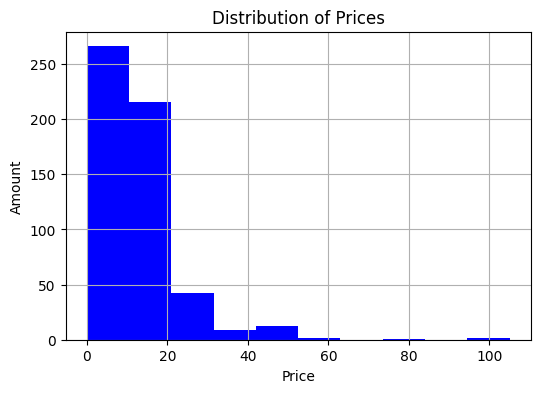

In [285]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=10, color='b')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Distribution of Prices')
plt.grid()
plt.show()

4.Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [286]:
df.price

0       8
1      22
2      15
3       6
4      12
       ..
545     8
546     8
547     8
548     8
549     8
Name: price, Length: 550, dtype: int64

In [287]:
print("Відповідь :")
print(f"    Max Ціна : ", _.max())
print(f"    Min Ціна: ",  _.min())
print(f"    Mean Ціна: ",  _.mean())
print(f"    Median Ціна: ",  _.median())

Відповідь :
    Max Ціна :  105
    Min Ціна:  0
    Mean Ціна:  13.1
    Median Ціна:  11.0


# Пошук та сортування даних

1.Який рейтинг у датасеті найвищий?

In [288]:
print ("Який рейтинг у датасеті найвищий?")
user_rating_max = df.user_rating.max()
print("Відповідь :",user_rating_max) 

Який рейтинг у датасеті найвищий?
Відповідь : 4.9


2.Скільки книг мають такий рейтинг?

In [289]:
print("Скільки книг мають такий рейтинг?")
sum = len(df[df['user_rating'] == 4.9])
print("Відповідь :",sum) 

Скільки книг мають такий рейтинг?
Відповідь : 52


3.Яка книга має найбільше відгуків?

Опис коду нижче:  
df['reviews'].max(): Цей вираз знаходить максимальне значення в колонці reviews.  
df['reviews'] == df['reviews'].max(): Створює булевий масив, де True вказує на те, що значення в колонці reviews дорівнює максимальному значенню.   
df.loc[...]: Використовується для вибору рядків DataFrame, де умова є True.

In [290]:
# Вибираємо рядки з максимальними значеннями в колонці 'reviews'

max_reviews = df.loc[df['reviews'] == df['reviews'].max()]
# Витягуємо назви книг
book_titles = max_reviews['name']
book_title=book_titles.tolist() # З обєкта  book_titles* формуємо список з іменами книг.
                                # Внашому випадку список буде містити 1 імя, його і виводимо в відповді

# Виводимо назви книг
print('Відповідь:', book_title[0])

Відповідь: Where the Crawdads Sing


4.  З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?


Опис коди нижче :  

df['year'] == 2015: Фільтрує DataFrame, щоб залишити тільки книги, видані в 2015 році.  
.sort_values(by='user_rating', ascending=False): Сортує результати за рейтингом користувачів у спадаючому порядку.  
.head(50): Вибирає перші 50 книг з відсортованого списку.  

top['price'].max(): Знаходить максимальну ціну в підмножині top.   
top.loc[...]: Вибирає рядки, де ціна дорівнює максимальному значенню.

In [291]:
top = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)

top_prices =top.loc[top['price'] == top['price'].max()]
top_price=top_prices["name"]
top_price_book_2015=top_price.tolist()
print("Відповідь : ", top_price_book_2015[0])


Відповідь :  Publication Manual of the American Psychological Association, 6th Edition


5.Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

Опис коду нижче:   
df[(df['genre'] == 'Fiction') & (df['year'] == 2010)] Вибірка з масиву df* За Жанром(поле 'genre') і(&) Роком('year')  
.sort_values(by='user_rating', ascending=False): Сортує результати за рейтингом користувачів у спадаючому порядку.  
.head(50): Вибирає перші 50 книг з відсортованого списку.   
fiction - новий масив з відсортованими за критеріями рядками.   
fiction.shape[0] Виводить кількість рядків в масиві fiction*.Що в нашому випадку відповідає кількості книг.


In [292]:
fiction = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].sort_values(by='user_rating', ascending=False).head(50)
print ("Відповідь : ",fiction.shape[0])

Відповідь :  20


6.Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

Опис коду нижче:   
df['year'].isin([2010, 2011]): Перевіряє, чи рік книги є 2010 або 2011. те саме що (df['year']== (2010 | 2011))  
df['user_rating'] == 4.9: Перевіряє, чи рейтинг користувачів дорівнює 4.9.  
&: Використовується для логічного "І", щоб об'єднати обидві умови.  
len(...): Підраховує кількість рядків, що відповідають обом умовам.  
Таким чином, book міститиме кількість книг, що відповідають заданим критеріям.

In [293]:
book = len(df[df['year'].isin([2010, 2011]) & (df['user_rating'] == 4.9)])
print("Відповідь : ", book)
book = len(df[(df['year']== (2010 | 2011)) & (df['user_rating'] == 4.9)])
print("Відповідь : ", book)

Відповідь :  1
Відповідь :  1


7.І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).  
Яка книга остання у відсортованому списку? 

In [294]:
books_2015 = df[(df['price'] < 8) & (df['year'] == 2015)].sort_values(by='price',ascending=True) # books_2015 * - масив в якому містяться рядки які відповідають умові завдання.
last_book_by_sorted = books_2015.iloc[-1]['name'] # last_book_by_sorted* - імя книжки останьої в відсортованому масиві books_2015*
print ("Відповідь : ", last_book_by_sorted)

Відповідь :  Old School (Diary of a Wimpy Kid #10)


# Агрегування даних та з'єднання таблиць

1.Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам   
Відповідь: Максимальна ціна для жанру Fiction: Відповідь  
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь  
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь  
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь  

In [295]:
# Групуємо за жанром та обчислюємо мінімальну і максимальну ціну
price_stats = df.groupby('genre')['price'].agg(['min', 'max']).reset_index()
print(price_stats)
max_fiction_price = price_stats.loc[price_stats['genre'] == 'Fiction', 'max'].values[0] # Вибирає з відсортованого масиву price_stats* - потрібні Значення 
                                                                                #  Жанр(['genre']) 'Fiction' , максимальна ціна 'max', отримуємо значення методом .values[0]*
min_fiction_price = price_stats.loc[price_stats['genre'] == 'Fiction', 'min'].values[0] # Аналогічно до попереднього тільки мінімальну ціну 'min'
print('Відповідь Максимальна ціна для жанру Fiction:', max_fiction_price)
print('Відповідь Максимальна ціна для жанру Fiction:', min_fiction_price)
max_non_fiction_price = price_stats.loc[price_stats['genre'] == 'Non Fiction', 'max'].values[0]
min_non_fiction_price = price_stats.loc[price_stats['genre'] == 'Non Fiction', 'min'].values[0]
print('Відповідь Максимальна ціна для жанру Non Fiction:', max_non_fiction_price)
print('Відповідь Максимальна ціна для жанру Non Fiction:', min_non_fiction_price)

         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105
Відповідь Максимальна ціна для жанру Fiction: 82
Відповідь Максимальна ціна для жанру Fiction: 0
Відповідь Максимальна ціна для жанру Non Fiction: 105
Відповідь Максимальна ціна для жанру Non Fiction: 0


2.Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count).  
 Не беріть усі стовпці, виберете тільки потрібні

Опис коду нижче:  
Групування за автором:  books = df.groupby('author')['name'].count().reset_index()  
df.groupby('author'): Групує дані за колонкою author.  
['name'].count(): Підраховує кількість книг (значень у колонці name) для кожного автора.  
.reset_index(): Скидає індекс, щоб отримати звичайний DataFrame.  

Перейменування колонок: books.columns = ['author', 'amount']  
Змінює назви колонок на author та amount, де amount - це кількість книг.

In [296]:
books = df.groupby('author')['name'].count().reset_index() # Групування за автором
books.columns = ['author', 'amount'] # Перейменування колонок:
books

,author,amount
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


2.1 Якої розмірності вийшла таблиця?

In [297]:
print(" Якої розмірності вийшла таблиця?")
rows, columns = books.shape
print()
print("Кількість рядків: ", rows)
print("Кількість стовбців: ", columns)

 Якої розмірності вийшла таблиця?

Кількість рядків:  248
Кількість стовбців:  2


2.2 Який автор має найбільше книг? 

In [298]:
autro_max_books=books.loc[books['amount'] == books['amount'].max()] # формуємо масив який буде містити рядок з авторм в якого найбільше книг з попередньо відсортованого масиву books*
print ("Відповідь : ", autro_max_books["author"].values[0]) # метод .values[0]* - повертає значення заданого параметру. В нашому випадку імя автора який має найбільше книг.

Відповідь :  Jeff Kinney


2.3 Скільки книг цього автора?

In [299]:
autro_max_books=books.loc[books['amount'] == books['amount'].max()] # формуємо масив який буде містити рядок з авторм в якого найбільше книг з попередньо відсортованого масиву books*
print ("Відповідь : ", autro_max_books["amount"].values[0])# метод .values[0]* - повертає значення заданого параметру. В нашому випадку кількість книг написаних цим автором .

Відповідь :  12


3.Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [300]:
rating = df.groupby('author')['user_rating'].agg('mean').round(2).reset_index() # Створюємо масив в якому буде імя автора і середне значення рейтенгу йог окниг з заокругленням до сотих
rating.columns = ['author', 'mean_rating']
rating

,author,mean_rating
0,Abraham Verghese,4.60
1,Adam Gasiewski,4.40
2,Adam Mansbach,4.80
3,Adir Levy,4.80
4,Admiral William H. McRaven,4.70
...,...,...
243,Walter Isaacson,4.57
244,William Davis,4.40
245,William P. Young,4.60
246,Wizards RPG Team,4.80


3.1 У якого автора середній рейтинг мінімальний?

In [301]:
author_min_rating =rating.loc[rating['mean_rating'] == rating['mean_rating'].min()] # в відсортованому вище масив rating* Шукаємо автора з найнижчим середнім рейтенгом.
                                                                    # author_min_rating - містить імя автора колонка('author') і його середній рейтинг колонка ('mean_rating')

print("Відповідь :", author_min_rating['author'].values[0]) # Виводими імя автора в якого найнижчий середній рейтинг

Відповідь : Donna Tartt


3.2 Який у цього автора середній рейтинг? 

In [302]:
print("Відповідь :", author_min_rating['mean_rating'].values[0])# # Виводими  середній рейтинг цього автора.

Відповідь : 3.9


4.З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1).  
 Збережіть результат у змінну  
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Опис коду нижче :  
pd.concat([books, rating['mean_rating'].round(2)], axis=1) - метод обєднює два масиви які мають однакову кількість рядків . Якщо різну видає помилку.  
 В нашому випадку ми обєднюємо масив books* і колонку 'mean_rating' з масиву rating* за стовпцями axis=1*   
Параметр axis=1 у функції pd.concat() вказує на те, що ви хочете об'єднати об'єкти по стовцях. Це означає, що нові стовпці будуть додані до існуючих, а не нові рядки.  
Параметр axis=0 у функції pd.concat() вказує на об'єднання об'єктів по рядках. Це означає, що нові рядки будуть додані до існуючих, а не нові стовпці.  
Ще один приклад обєднання :   
Якщо два масива мають аднаковий сповпець то їх можна обєднати методом pd.merge() 

new_table = pd.merge(books, rating[['author', 'mean_rating']], on='author', how='left')

In [303]:
new_table = pd.concat([books, rating['mean_rating'].round(2)], axis=1) # Перший метод 
new_table = pd.merge(books, rating[['author', 'mean_rating']], on='author', how='left') # Другий метод
new_table

,author,amount,mean_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80


4.1Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [304]:
new_table.sort_values(by=['amount', 'mean_rating'])

,author,amount,mean_rating
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77


4.2Який автор перший у списку?

In [305]:
first_author=new_table.sort_values(by=['amount', 'mean_rating']).iloc[0]['author'] 
print("Відповідь : ",first_author)

Відповідь :  Muriel Barbery


#  Візуалізація даних

1.1 Рейтинг користувачів vs. ціна за книгу

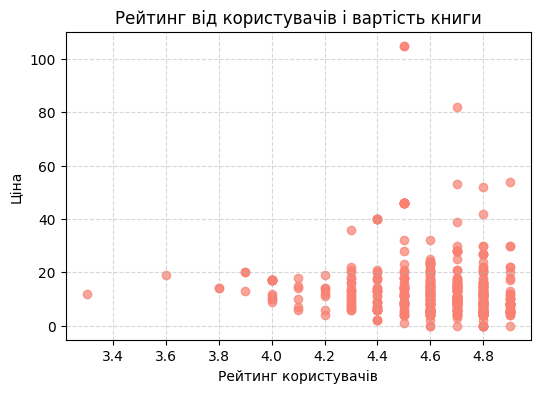

In [306]:
plt.figure(figsize=(6, 4))
plt.scatter(df['user_rating'], df['price'], color='salmon', alpha=0.7)
plt.title('Рейтинг від користувачів і вартість книги')
plt.xlabel('Рейтинг користувачів')
plt.ylabel('Ціна')
plt.grid(True, linestyle='--', alpha=0.5)

1.2 Середня ціна книг за роками

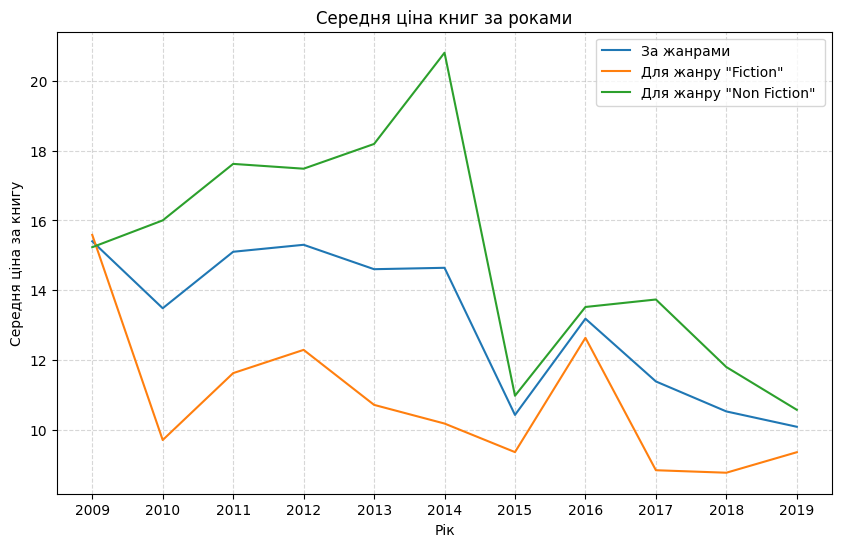

In [307]:
# Групуємо дані за роками та обчислюємо середню ціну
yearly_avg_price = df.groupby('year').price.mean()
yearly_avg_price_genre = df.groupby(['year', 'genre'])['price'].mean().unstack()

# Побудуємо графік
plt.figure(figsize=(10, 6))
yearly_avg_price.plot(kind='line', label='За жанрами')
yearly_avg_price_genre['Fiction'].plot(kind='line', label='Для жанру "Fiction" ')
yearly_avg_price_genre['Non Fiction'].plot(kind='line', label='Для жанру "Non Fiction" ')
plt.title('Середня ціна книг за роками')
plt.xlabel('Рік')
plt.ylabel('Середня ціна за книгу')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(yearly_avg_price.index[::1]) 
plt.legend()
plt.show()

1.3 Гістограма розподілу середніх рейтингів за роками та жанрами

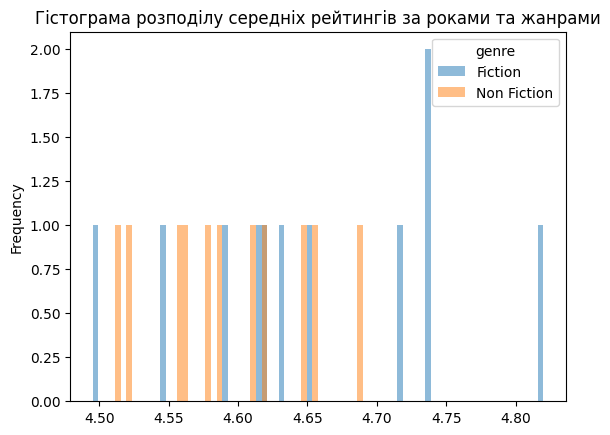

In [308]:
df.groupby(['year','genre']).user_rating.mean().unstack().plot(kind='hist', alpha=0.5, bins=80)

plt.title('Гістограма розподілу середніх рейтингів за роками та жанрами')
plt.show()